In [1]:
!wget http://www.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz

--2022-09-09 20:26:18--  http://www.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz
Resolving www.eecs.berkeley.edu (www.eecs.berkeley.edu)... 23.185.0.1, 2620:12a:8001::1, 2620:12a:8000::1
Connecting to www.eecs.berkeley.edu (www.eecs.berkeley.edu)|23.185.0.1|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz [following]
--2022-09-09 20:26:19--  https://www.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz
Connecting to www.eecs.berkeley.edu (www.eecs.berkeley.edu)|23.185.0.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz [following]
--2022-09-09 20:26:19--  https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz
Resolving www2.eecs.berkeley.edu (ww

In [2]:
!tar -xvf "/content/BSR_bsds500.tgz"

BSR/
BSR/documentation/
BSR/documentation/Arbelaez_Maire_Fowlkes_Malik_TPAMI2010.pdf
BSR/bench/
BSR/bench/source/
BSR/bench/source/match.hh
BSR/bench/source/Matrix.cc
BSR/bench/source/Timer.cc
BSR/bench/source/csa_types.h
BSR/bench/source/csa.cc
BSR/bench/source/correspondPixels.cc
BSR/bench/source/build.sh
BSR/bench/source/match.cc
BSR/bench/source/Sort.hh
BSR/bench/source/csa_defs.h
BSR/bench/source/Timer.hh
BSR/bench/source/Exception.cc
BSR/bench/source/String.cc
BSR/bench/source/Array.hh
BSR/bench/source/kofn.hh
BSR/bench/source/Random.hh
BSR/bench/source/Exception.hh
BSR/bench/source/.gitignore
BSR/bench/source/kofn.cc
BSR/bench/source/build.m
BSR/bench/source/Random.cc
BSR/bench/source/Point.hh
BSR/bench/source/README
BSR/bench/source/Matrix.hh
BSR/bench/source/csa.hh
BSR/bench/source/String.hh
BSR/bench/bench_bsds500.m
BSR/bench/data/
BSR/bench/data/groundTruth/
BSR/bench/data/groundTruth/6046.mat
BSR/bench/data/groundTruth/2018.mat
BSR/bench/data/groundTruth/8068.mat
BSR/bench/

In [1]:
import os
import time
import random
import glob
import numpy as np

import cv2
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
os.makedirs("dataset", exist_ok=True)
os.makedirs("dataset/train", exist_ok=True)
os.makedirs("dataset/val", exist_ok=True)
os.makedirs("dataset/test", exist_ok=True)

dir_train_HR2X = "dataset/train/HR2X"
dir_train_HR4X = "dataset/train/HR4X"
dir_train_LR = "dataset/train/LR"
os.makedirs(dir_train_HR2X, exist_ok=True)
os.makedirs(dir_train_HR4X, exist_ok=True)
os.makedirs(dir_train_LR, exist_ok=True)

dir_val_HR2X = "dataset/val/HR2X"
dir_val_HR4X = "dataset/val/HR4X"
dir_val_LR = "dataset/val/LR"
os.makedirs(dir_val_HR2X, exist_ok=True)
os.makedirs(dir_val_HR4X, exist_ok=True)
os.makedirs(dir_val_LR, exist_ok=True)

dir_test_HR2X = "dataset/test/HR2X"
dir_test_HR4X = "dataset/test/HR4X"
dir_test_LR = "dataset/test/LR"
os.makedirs(dir_test_HR2X, exist_ok=True)
os.makedirs(dir_test_HR4X, exist_ok=True)
os.makedirs(dir_test_LR, exist_ok=True)

In [3]:
def load(path, shape, RGB_convert=True):
    img= cv2.imread(path)
    if RGB_convert:
      img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img= cv2.resize(img, shape)
    return img

In [4]:
def save_data(directory, dir_HR2X, dir_HR4X, dir_LR):
  HR2X=[]
  HR4X=[]
  LR=[]

  for img_path in glob.glob(directory+ str('/*')): 
    img_name = img_path.split("/")[-1]
    if img_name.split('.')[-1] != "jpg":
      continue
    
    img_HR_2X = load(img_path, (192, 192), False)
    cv2.imwrite(os.path.join(dir_HR2X, img_name), img_HR_2X)

    img_HR_4X = load(img_path, (384, 384), False)
    cv2.imwrite(os.path.join(dir_HR4X, img_name), img_HR_4X)

    img_LR = load(img_path, (96,96), False)
    cv2.imwrite(os.path.join(dir_LR, img_name), img_LR)

save_data("/content/BSR/BSDS500/data/images/train", 
          dir_train_HR2X, 
          dir_train_HR4X,
          dir_train_LR)

# save_data("/content/BSR/BSDS500/data/images/val", 
#           dir_val_HR2X, 
#           dir_val_HR4X,
#           dir_val_LR)

save_data("/content/BSR/BSDS500/data/images/val", 
          dir_train_HR2X, 
          dir_train_HR4X,
          dir_train_LR)

save_data("/content/BSR/BSDS500/data/images/test", 
          dir_test_HR2X, 
          dir_test_HR4X,
          dir_test_LR)

In [5]:
def get_data(directory):
  X = []
  y = []
  for folder in glob.glob(directory+str("/*")):
    print(folder)
    for img_path in glob.glob(folder+str("/*")):
      if folder == os.path.join(directory, 'HR4X'):
        X.append(load(img_path, (384, 384)))

      # if folder == os.path.join(directory, 'HR2X'):
      #   X.append(load(img_path, (192, 192)))

      if folder == os.path.join(directory, 'LR'):
        y.append(load(img_path, (96,96)))

  X = (np.array(X)/255.0).astype("float32")
  y = (np.array(y)/255.0).astype("float32")
  return X, y

In [6]:
HR_train, LR_train = get_data('/content/dataset/train')
HR_train.shape, LR_train.shape

/content/dataset/train/LR
/content/dataset/train/HR4X
/content/dataset/train/HR2X


((300, 384, 384, 3), (300, 96, 96, 3))

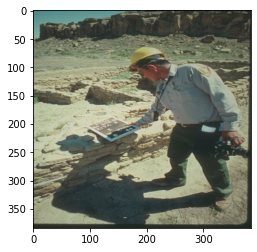

In [7]:
plt.imshow(HR_train[0])

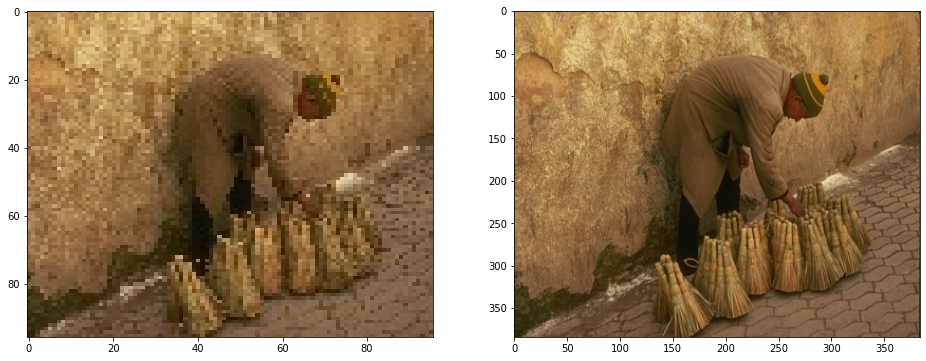

In [8]:
sample_index = 5

f, ax= plt.subplots(1,2, figsize=(16, 6))
ax[0].imshow(LR_train[sample_index], aspect='auto')
ax[1].imshow(HR_train[sample_index], aspect='auto')
plt.show()

In [9]:
!pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import tensorflow as tf
import keras
from keras.layers import Conv2D, LeakyReLU, concatenate, UpSampling2D, Input, ReLU, MaxPooling2D
from keras.models import Model
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import vgg19
from tensorflow.keras.optimizers import Adam
from tensorflow_addons.layers import SpectralNormalization

In [11]:
class ResidualDenseBlock(tf.keras.Model):
  def __init__(self):
    super(ResidualDenseBlock, self).__init__()

    self.conv_1 = Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding="same")
    self.conv_2 = Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding="same")
    self.conv_3 = Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding="same")
    self.conv_4 = Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding="same")
    self.conv_5 = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding="same")

    self.activation_1 = LeakyReLU(alpha=0.2)
    self.activation_2 = LeakyReLU(alpha=0.2)
    self.activation_3 = LeakyReLU(alpha=0.2)
    self.activation_4 = LeakyReLU(alpha=0.2)

  def call(self, x):
    x_1 = self.activation_1(self.conv_1(x))
    x_2 = self.activation_2(self.conv_2(concatenate([x, x_1])))
    x_3 = self.activation_3(self.conv_3(concatenate([x, x_1, x_2])))
    x_4 = self.activation_4(self.conv_4(concatenate([x, x_1, x_2, x_3])))
    x_5 = self.conv_5(concatenate([x, x_1, x_2, x_3, x_4]))

    # Emperically we use 0.2 to scale the residual for better performance
    return x_5 * 0.2 + x


In [12]:
class RRDB(tf.keras.Model):
  def __init__(self):
    super(RRDB, self).__init__()
    self.res_1 = ResidualDenseBlock()
    self.res_2 = ResidualDenseBlock()
    self.res_3 = ResidualDenseBlock()

  def call(self, X_input):
    x = self.res_1(X_input)
    x = self.res_2(x)
    x = self.res_3(x)

    return x * 0.2 + X_input

In [13]:
class RRDBNet(tf.keras.Model):
  def __init__(self):
    super(RRDBNet, self).__init__()
    # padding = 1
    self.first_conv = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), 
                             padding="same")
    
    self.rb_1 = RRDB()
    self.rb_2 = RRDB()
    self.rb_3 = RRDB()
    self.rb_4 = RRDB()
    self.rb_5 = RRDB()
    self.rb_6 = RRDB()

    # padding = 1
    self.conv_body = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), 
                            padding="same")   
     
    self.up_1 = UpSampling2D()
    self.conv_1 = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), 
                            padding="same")
    self.activation_1 = LeakyReLU(alpha=0.2)


    self.up_2 = UpSampling2D()
    self.conv_2 = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), 
                            padding="same")
    self.activation_2 = LeakyReLU(alpha=0.2)


    self.conv_3 = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), 
                            padding="same")
    self.activation_3 = LeakyReLU(alpha=0.2)

    self.conv_4 = Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), 
                         padding="same")
    
  def call(self, x_input):
    x = self.first_conv(x_input)
    x1 = self.rb_1(x)
    x1 = self.rb_2(x1)
    x1 = self.rb_3(x1)
    x1 = self.rb_4(x1)
    x1 = self.rb_5(x1)
    x1 = self.rb_6(x1)
    x1 = self.conv_body(x1)

    x = x + x1

    x = self.up_1(x)
    x = self.conv_1(x)
    x = self.activation_1(x)

    x = self.up_2(x)
    x = self.conv_2(x)
    x = self.activation_2(x)

    x = self.conv_3(x)
    x = self.activation_3(x)
    x = self.conv_4(x)

    return x


In [14]:
rrdbnet = RRDBNet()
rrdbnet.build((None, 256, 256, 3))
rrdbnet.summary()

Model: "rrdb_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             multiple                  1792      
                                                                 
 rrdb (RRDB)                 multiple                  719424    
                                                                 
 rrdb_1 (RRDB)               multiple                  719424    
                                                                 
 rrdb_2 (RRDB)               multiple                  719424    
                                                                 
 rrdb_3 (RRDB)               multiple                  719424    
                                                                 
 rrdb_4 (RRDB)               multiple                  719424    
                                                                 
 rrdb_5 (RRDB)               multiple                  719

In [15]:
batch_size = 5
epochs = 500
learning_rate = 2e-4

generator_optimizer = Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.99)

In [16]:
generator = RRDBNet()
generator.build((None, LR_train.shape[1], LR_train.shape[2], LR_train.shape[3]))

In [17]:
# epochs = 5

# generator.compile(optimizer=generator_optimizer, loss="mse")
# generator.fit(LR_train, HR_train, batch_size=batch_size, epochs=epochs, 
#               verbose=1)

In [18]:
os.makedirs("weights", exist_ok=True)

generator_best_weights_directory = "weights/generator_best_weights.h5"

save_samples_dir = "save_samples"

os.makedirs(save_samples_dir, exist_ok=True)

In [19]:
import os, shutil

def clear_directory(directory):
  for filename in os.listdir(directory):
    file_path = os.path.join(directory, filename)
    try:
      if os.path.isfile(file_path) or os.path.islink(file_path):
        os.unlink(file_path)
      elif os.path.isdir(file_path):
        shutil.rmtree(file_path)
    except Exception as e:
      print('Failed to delete %s. Reason: %s' % (file_path, e))

In [20]:
clear_directory(save_samples_dir)

In [34]:
import sys

batch_size = 5
n_epoch = 5
n_batches = LR_train.shape[0] // batch_size 

lowest_mse_loss = sys.maxsize
for epoch in range(n_epoch):
  start = 0
  end_epoch = True

  while(end_epoch):
    batch_time = time.time()
    i, j= (start*batch_size), ((start+1)*batch_size)
    if j >= LR_train.shape[0]:
      end_epoch = False
      j = -1
    start += 1
    X, y = LR_train[i:j], HR_train[i:j]

    with tf.GradientTape() as tape:
      y_hat = generator(X)
      mse_loss = tf.reduce_mean(tf.reduce_mean(tf.math.squared_difference(y, y_hat), axis=-1))
      grad = tape.gradient(mse_loss, generator.trainable_weights)
      generator_optimizer.apply_gradients(zip(grad, generator.trainable_weights))

    print('\r', 'Epoch ', epoch, ' | Batch {}/{} '.format(start, n_batches), 
          '| gen_loss:', f"{mse_loss:.5f}", "| Batch Time:", f"{time.time() - batch_time:.2f}", end='') 
     
  print("\nEpoch: [{}/{}] step: mse: {:.3f}".format(epoch, n_epoch, mse_loss))

  if mse_loss < lowest_mse_loss:
    lowest_mse_loss = mse_loss
    generator.save_weights(generator_best_weights_directory)

  if epoch%10 == 0:
    img = generator.predict(LR_train[np.newaxis, sample_index])[0]

    img = Image.fromarray(np.uint8(img*255))
    img.save(os.path.join(save_samples_dir, "{}_epoch_result.jpg".format(epoch)))

 Epoch  0  | Batch 60/60  | gen_loss: 0.00535 | Batch Time: 0.46
Epoch: [0/5] step: mse: 0.005
 Epoch  1  | Batch 60/60  | gen_loss: 0.00532 | Batch Time: 0.46
Epoch: [1/5] step: mse: 0.005
 Epoch  2  | Batch 60/60  | gen_loss: 0.00544 | Batch Time: 0.47
Epoch: [2/5] step: mse: 0.005
 Epoch  3  | Batch 60/60  | gen_loss: 0.00531 | Batch Time: 0.46
Epoch: [3/5] step: mse: 0.005
 Epoch  4  | Batch 60/60  | gen_loss: 0.00578 | Batch Time: 0.47
Epoch: [4/5] step: mse: 0.006


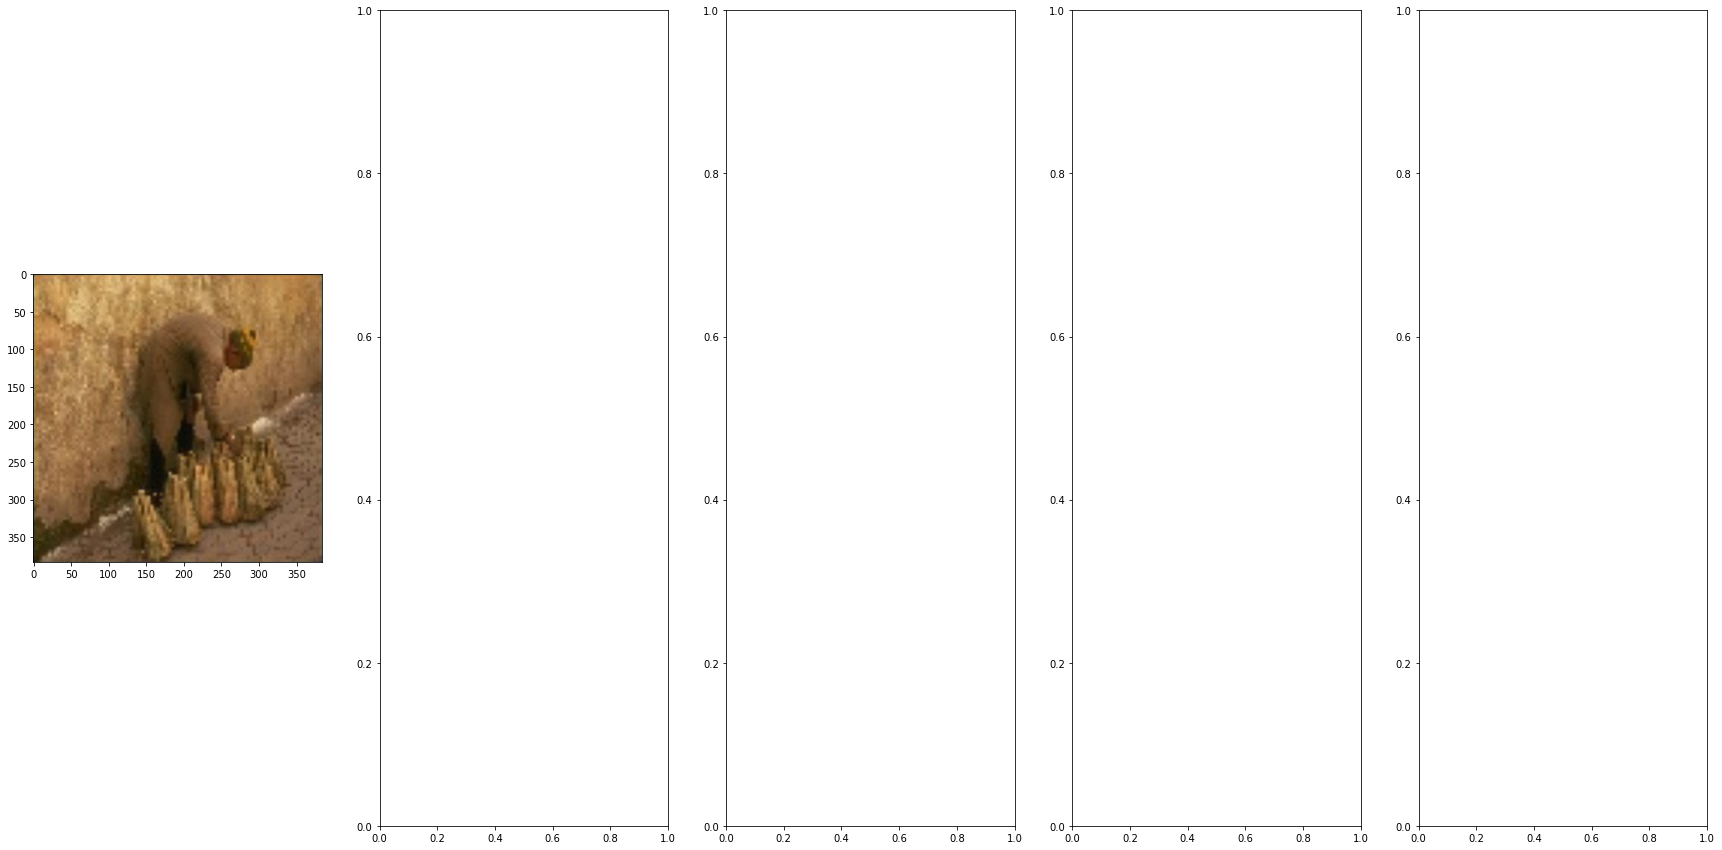

In [35]:
fig, ax = plt.subplots(1, 5, figsize=(30, 15))
for i, file in enumerate(sorted(glob.glob(save_samples_dir+str("/*")))[-5:]):
  img = load(file, shape=HR_train.shape[1:-1])
  ax[i].imshow(img)

plt.show()

In [6]:
class UNetDiscriminator(tf.keras.Model):
  def __init__(self):
    super(UNetDiscriminator, self).__init__()

    self.conv_0 = SpectralNormalization(Conv2D(filters=64, kernel_size=(3,3), 
                                               strides=(1,1), padding="same", 
                                               use_bias=False))
    self.conv_1 = SpectralNormalization(Conv2D(filters=128, kernel_size=(4,4), 
                                               strides=(2,2), padding="same", 
                                               use_bias=False))    
    self.conv_2 = SpectralNormalization(Conv2D(filters=256, kernel_size=(4,4), 
                                               strides=(2,2), padding="same", 
                                               use_bias=False))
    self.conv_3 = SpectralNormalization(Conv2D(filters=512, kernel_size=(4,4), 
                                               strides=(2,2), padding="same", 
                                               use_bias=False))
    
    self.conv_4 = SpectralNormalization(Conv2D(filters=256, kernel_size=(3,3), 
                                               strides=(1,1), padding="same", 
                                               use_bias=False))
    self.conv_5 = SpectralNormalization(Conv2D(filters=128, kernel_size=(3,3), 
                                               strides=(1,1), padding="same", 
                                               use_bias=False))
    self.conv_6 = SpectralNormalization(Conv2D(filters=64, kernel_size=(3,3), 
                                               strides=(1,1), padding="same", 
                                               use_bias=False))
    
    self.conv_7 = SpectralNormalization(Conv2D(filters=64, kernel_size=(3,3), 
                                               strides=(1,1), padding="same", 
                                               use_bias=False))
    self.conv_8 = SpectralNormalization(Conv2D(filters=64, kernel_size=(3,3), 
                                               strides=(1,1), padding="same", 
                                               use_bias=False))
    
    self.conv_9 = SpectralNormalization(Conv2D(filters=1, kernel_size=(3,3), 
                                               strides=(1,1), padding="same", 
                                               use_bias=False))
    
  def call(self, x):
    x_0 = LeakyReLU(alpha=0.2)(self.conv_0(x)) #256x256
    x_1 = LeakyReLU(alpha=0.2)(self.conv_1(x_0)) #128x128
    x_2 = LeakyReLU(alpha=0.2)(self.conv_2(x_1)) #64x64
    x_3 = LeakyReLU(alpha=0.2)(self.conv_3(x_2)) #32x32

    x_3 = UpSampling2D(interpolation="bilinear")(x_3)
    x_4 = LeakyReLU(alpha=0.2)(self.conv_4(x_3)) #64x64
    x_4 = x_4 + x_2

    x_4 = UpSampling2D(interpolation="bilinear")(x_4)
    x_5 = LeakyReLU(alpha=0.2)(self.conv_5(x_4)) #128x128
    x_5 = x_5 + x_1

    x_5 = UpSampling2D(interpolation="bilinear")(x_5)
    x_6 = LeakyReLU(alpha=0.2)(self.conv_6(x_5)) #256x256
    x_6 = x_6 + x_0

    out = LeakyReLU(alpha=0.2)(self.conv_7(x_6)) #256x256
    out = LeakyReLU(alpha=0.2)(self.conv_8(out)) #256x256
    out = self.conv_9(out)

    return out

In [2]:
class Vgg19FeaturesModel(tf.keras.Model):
  def __init__(self):
    super(Vgg19FeaturesModel, self).__init__()
    self.model = VGG19(include_top=False, weights='imagenet')
    self.model.trainable = False

  def create_vgg19_custom_model(self):
    input_layer = Input(shape=(None, None, 3))

    # Block 1
    x = Conv2D(64, (3, 3), padding='same', name='block1_conv1')(input_layer)
    x = ReLU()(x)
    x = Conv2D(64, (3, 3), padding='same', name='block1_conv2')(x)
    x = ReLU()(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3), padding='same', name='block2_conv1')(x)
    x = ReLU()(x)
    x = Conv2D(128, (3, 3), padding='same', name='block2_conv2')(x)
    x = ReLU()(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), padding='same', name='block3_conv1')(x)
    x = ReLU()(x)
    x = Conv2D(256, (3, 3), padding='same', name='block3_conv2')(x)
    x = ReLU()(x)
    x = Conv2D(256, (3, 3), padding='same', name='block3_conv3')(x)
    x = ReLU()(x)
    x = Conv2D(256, (3, 3), padding='same', name='block3_conv4')(x)
    x = ReLU()(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), padding='same', name='block4_conv1')(x)
    x = ReLU()(x)
    x = Conv2D(512, (3, 3), padding='same', name='block4_conv2')(x)
    x = ReLU()(x)
    x = Conv2D(512, (3, 3), padding='same', name='block4_conv3')(x)
    x = ReLU()(x)
    x = Conv2D(512, (3, 3), padding='same', name='block4_conv4')(x)
    x = ReLU()(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3), padding='same', name='block5_conv1')(x)
    x = ReLU()(x)
    x = Conv2D(512, (3, 3), padding='same', name='block5_conv2')(x)
    x = ReLU()(x)
    x = Conv2D(512, (3, 3), padding='same', name='block5_conv3')(x)
    x = ReLU()(x)
    x = Conv2D(512, (3, 3), padding='same', name='block5_conv4')(x)
    x = ReLU()(x)
    output_layer = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

    return Model(inputs=input_layer, outputs=output_layer, name="VGG19_features")

  def call(self, x):
    x = vgg19.preprocess_input(x*255.0)
    return self.model(x)

In [7]:
discriminator = UNetDiscriminator()
discriminator.build((5, 384, 384, 3))
discriminator.summary()

Model: "u_net_discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 spectral_normalization (Spe  multiple                 1792      
 ctralNormalization)                                             
                                                                 
 spectral_normalization_1 (S  multiple                 131200    
 pectralNormalization)                                           
                                                                 
 spectral_normalization_2 (S  multiple                 524544    
 pectralNormalization)                                           
                                                                 
 spectral_normalization_3 (S  multiple                 2097664   
 pectralNormalization)                                           
                                                                 
 spectral_normalization_4 (S  multiple         

In [4]:
vgg_model = Vgg19FeaturesModel()
vgg_model.build((5, 384, 384, 3))
vgg_model.summary()

Model: "vgg19_features_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, None, None, 512)   20024384  
                                                                 
Total params: 20,024,384
Trainable params: 0
Non-trainable params: 20,024,384
_________________________________________________________________


In [24]:
discriminator_optimizer = Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.99)

In [ ]:
import sys
n_epoch = 5
n_batches = LR_train.shape[0] // batch_size 

for epoch in range(n_epoch):
  start = 0
  end_epoch = True

  while(end_epoch):
    batch_time = time.time()
    i, j= (start*batch_size), ((start+1)*batch_size)
    if j >= LR_train.shape[0]:
      end_epoch = False
      j = -1
    start += 1
    
    X, y = LR_train[i: j], HR_train[i: j]
    lowest_mse_loss = sys.maxsize

    with tf.GradientTape(persistent=True) as tape:
      fake_img = generator(X)
      fake_logits = discriminator(fake_img)
      real_logits = discriminator(y)
      fake_feature = vgg_model(fake_img)
      real_feature = vgg_model(y)

      #discriminator. loss
      d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(fake_logits , tf.zeros_like(fake_logits)))
      d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(real_logits,tf.ones_like(real_logits)))
      d_loss= d_loss_fake + d_loss_real

      #generator. loss
      g_loss= tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(fake_logits , 
                                                                    tf.ones_like(fake_logits)))
      mse_loss = tf.reduce_mean(tf.reduce_mean(tf.math.squared_difference(fake_img, y), axis=-1))
      vgg_loss = tf.reduce_mean(tf.reduce_mean(tf.math.squared_difference(fake_feature, real_feature), axis=-1))

      g_loss = mse_loss + vgg_loss + g_loss

      grad = tape.gradient(g_loss, generator.trainable_weights)
      generator_optimizer.apply_gradients(zip(grad, generator.trainable_weights))

      grad = tape.gradient(d_loss, discriminator.trainable_weights)
      discriminator_optimizer.apply_gradients(zip(grad, discriminator.trainable_weights))

    print('\r', 'Epoch', epoch, '| Batch', f"{start}/{n_batches}",
            '| disc_loss:', f"{d_loss:.5f}", '| total_generator_loss:', f"{g_loss:.5f}", 
            "| Step Time:", f"{time.time() - batch_time:.2f}", end='')   
    
  print("\nEpoch: [{}/{}] step: Discriminator.loss: {:.3f}: Generator.loss: {:.3f}".format(
          epoch, n_epoch , d_loss, g_loss))
  
  if g_loss < lowest_mse_loss:
    lowest_mse_loss = g_loss
    generator.save_weights(generator_best_weights_directory)

  if epoch%20 == 0:
      img = generator.predict(LR_train[np.newaxis, sample_index])[0]
      img = Image.fromarray(np.uint8(img*255))
      img.save(os.path.join(save_samples_dir, "{}_epoch_result.jpg".format(epoch)))

In [ ]:
fig, ax = plt.subplots(3, 5, figsize=(30, 15))
for i, file in enumerate(sorted(glob.glob(save_samples_dir+str("/*")))[:15]):
  img = load(file, shape=HR_train.shape[1:-1])
  ax[i//5][i%5].imshow(img, aspect="auto")
  
plt.show()

In [ ]:
f, ax= plt.subplots(1,3, figsize=(16, 6))
ax[0].imshow(LR_train[sample_index], aspect='auto')
ax[1].imshow(load(sorted(glob.glob(save_samples_dir+str("/*")))[-1], (384, 384)), aspect='auto')
ax[2].imshow(HR_train[sample_index], aspect='auto')
plt.show()